In [28]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline

# k-Nearest Neighbors

* The k-NN algorithm is arguably the simplest machine learning algorithm.
* Building the model consists only of storing the training dataset.
* To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

# k-Neighbors classification

* k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for. 
* The prediction is then simply the known output for this training point.

In [29]:
import mglearn

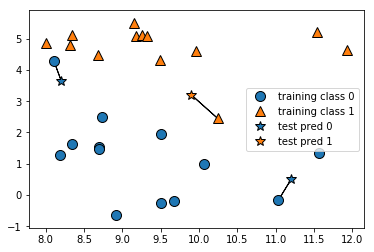

In [30]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

* we added three new data points, shown as stars. 
* For each of them, we marked the closest point in the training set. 
* The prediction of the one-nearest-neighbor algorithm is the label of that point.

* Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors. * This is where the name of the k-nearest neighbors algorithm comes from. 
* When considering more than one neighbor, we use voting to assign a label. 
* This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent
* In other words, the majority class among the k-nearest neighbors.

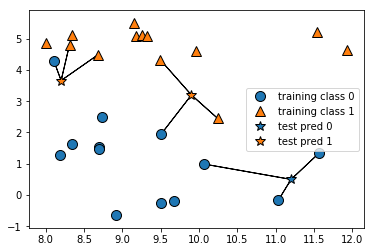

In [31]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

* Again, the prediction is shown as the color of the cross. You can see that the prediction for the new data point at the top left is not the same as the prediction when we used only one neighbor.
* While this illustration is for a binary classification problem, this method can be applied to datasets with any number of classes. 
* For more classes, we count how many neighbors belong to each class and again predict the most common class.

# using scikit-learn

*  we split our data into a training and a test set so we can evaluate generalization performance

In [32]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [35]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


* we can find that our model predicted the class correctly for 86% of the samples in the test dataset.

# Analyzing KNeighborsClassifier

* For two-dimensional datasets, we can also illustrate the prediction for all possible testpoints in the xy-plane. 
* We color the plane according to the class that would be assigned to a point in this region. This lets us view the decision boundary, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.

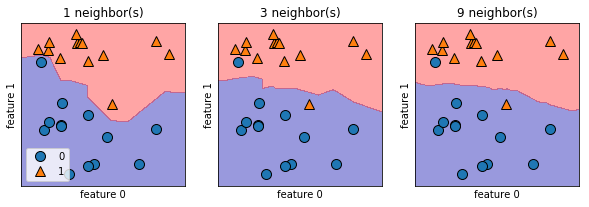

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

* From the above figure we find that using a single neighbor results in a decision boundary that follows the training data closely.
* Considering more and more neighbors leads to a smoother decision boundary.
* using few neighbors corresponds to high model complexity  and using many neighbors corresponds to low model complexity.
* If you consider the extreme case where the number of neighbors is the number of all datapoints in the training set, each test point would have exactly the same neighbors  and all predictions would be the same: the class that is most frequent in the training set.

In [37]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

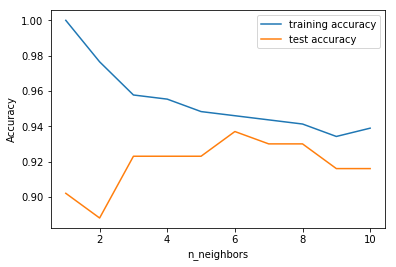

In [38]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings: 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)   
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

* The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis.
* While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting.
* Considering a single nearest neighbor, the prediction on the training set is perfect.
* But when more neighbors are considered, the model becomes simpler and the training accuracy drops.
* Test set accuracy for using a single neighbor is lower than when using more neighbors.
* For example, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle,using around six neighbors. Still, it is good to keep the scale of the plot in mind.
* Theworst performance is around 88% accuracy, which might still be acceptable.

# k-neighbors regression

* There is also a regression variant of the k-nearest neighbors algorithm.

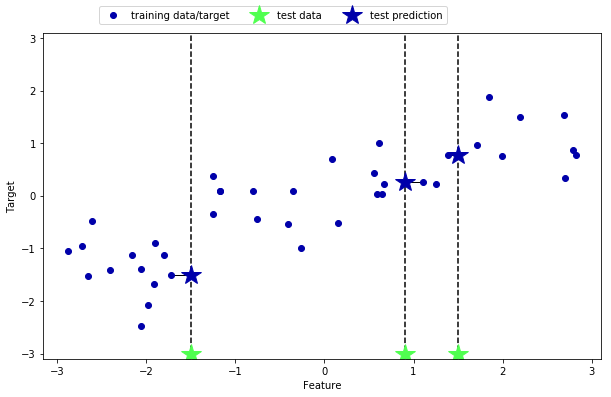

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

* We’ve added three test data points as green stars on the x-axis. 
* The prediction using a single neighbor is just the target value of the nearest neighbor,which are  shown as blue stars.

* Again, we can use more than the single closest neighbor for regression.
* When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors.

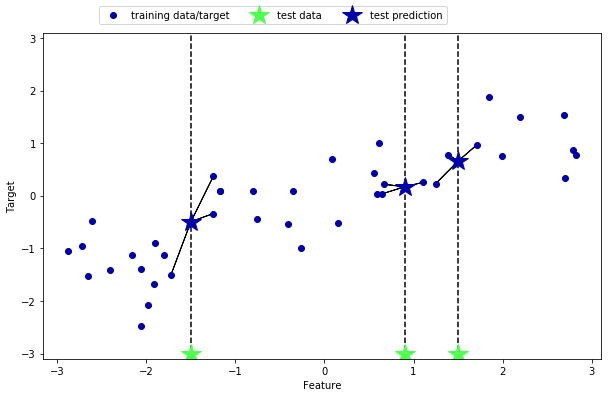

In [40]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [41]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [43]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


* We can also evaluate the model using the score method, which for regressors returns the $R^2$ score.
* $R^2$ score yields a score between 0 and 1.
* A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, y_train.

In [44]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


* Here,the score is 0.83, which indicates a relatively good model fit.

# Analyzing KNeighborsRegressor

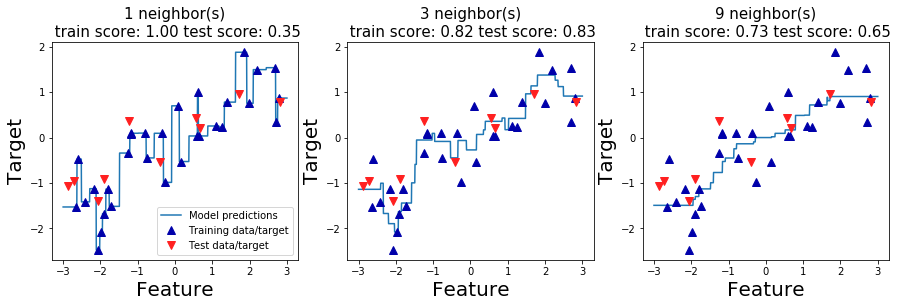

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)),fontsize = 15)
    ax.set_xlabel("Feature",fontsize =20)
    ax.set_ylabel("Target",fontsize =20)
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

* As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. 
* Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

# Strengths, weaknesses, and parameters

* $ parameters $ :

   * two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points.
   * using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter.
   * By default, Euclidean distance is used, which works well in many settings.
   
   
* $ strengths $ :

   * It is very easy to understand, and often gives reasonable performance without a lot of adjustments.
   * Building the nearest neighbors model is usually very fast, but when your training set is very large  prediction can be slow.
   
   
* $ Weaknesses $ :

   * When using the k-NN algorithm, it’s important to preprocess your data. This approach often does not perform well on datasets with many features  and it does particularly badly with datasets where most features
 are 0 most of the time